In [5]:
## olist ecommerce analysis

In [6]:
## Part 1: Data Exploration

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
# connecting the data

file_path = ('D:\\DS\\SQL Exam\\olist_data.csv')
data = pd.read_csv(file_path)

In [9]:
# making sure the data can be read

data.head()

,product_id,seller_id,category_name,city,price,freight_value,order_purchase_timestamp
0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,volta redonda,58.90,13.29,2017-09-13 08:59:02
1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,pet_shop,sao paulo,239.90,19.93,2017-04-26 10:53:06
2,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,moveis_decoracao,borda da mata,199.00,17.87,2018-01-14 14:33:31
3,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,perfumaria,franca,12.99,12.79,2018-08-08 10:00:35
4,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,ferramentas_jardim,loanda,199.90,18.14,2017-02-04 13:57:51


In [10]:
# Checking for data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   product_id                112650 non-null  object 
 1   seller_id                 112650 non-null  object 
 2   category_name             111047 non-null  object 
 3   city                      112650 non-null  object 
 4   price                     112650 non-null  float64
 5   freight_value             112650 non-null  float64
 6   order_purchase_timestamp  112650 non-null  object 
dtypes: float64(2), object(5)
memory usage: 6.0+ MB


In [11]:
## Part 2: Missing Nulls

In [12]:
# Looks like its fine, we already change the datatype in SQL
# let's check for missing values

data.isnull().sum()

product_id                     0
seller_id                      0
category_name               1603
city                           0
price                          0
freight_value                  0
order_purchase_timestamp       0
dtype: int64

In [13]:
# Considerable number of nulls in category_name column
# let's check the percentage from the total column

null_col = data['category_name']
X = null_col.isnull().sum()
Y = null_col.count()
calc_percent = (X / Y * 100).round(1)
print(calc_percent)

1.4


In [14]:
# Seems like the null values is below 1.5%
# but just to be rigorous, we will treat the null values
# since we are going to count the best selling category, we will fill the null values with it

category_col = null_col.value_counts()
print(category_col)

cama_mesa_banho                  11115
beleza_saude                      9670
esporte_lazer                     8641
moveis_decoracao                  8334
informatica_acessorios            7827
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: category_name, Length: 73, dtype: int64


In [15]:
# let's replace the missing category values by just inserting the most mentioned category name

data['category_name'].fillna('cama_mesa_banho', inplace = True)

In [16]:
# let's check again

data.isnull().sum()

product_id                  0
seller_id                   0
category_name               0
city                        0
price                       0
freight_value               0
order_purchase_timestamp    0
dtype: int64

In [17]:
## Part 3: Duplicated Values

In [18]:
# lets check for duplicated values
# I think we dont need to check for duplicates values since people can always order the same thing from an e-commerce
# hence I insert an order_purchase_timestamp on the dataset
# its impossible for the same people ordering / selling the same stuff in the exact hour & seconds

duplicates = data.duplicated(keep=False).sum()
duplicates_percent = (duplicates / data.count() * 100).round(1)
print(f'number of duplicates: {duplicates}')
print(duplicates_percent)

number of duplicates: 17373
product_id                  15.4
seller_id                   15.4
category_name               15.4
city                        15.4
price                       15.4
freight_value               15.4
order_purchase_timestamp    15.4
dtype: float64


In [19]:
# quite significant number, let's eliminate it, and store the changes into the main dataset

data.drop_duplicates(keep= False, inplace= True)

# and let's recheck it on the main data

duplicates = data.duplicated(keep=False).sum()
duplicates_percent = (duplicates / data.count() * 100).round(1)
print(f'number of duplicates: {duplicates}')
print(duplicates_percent)

number of duplicates: 0
product_id                  0.0
seller_id                   0.0
category_name               0.0
city                        0.0
price                       0.0
freight_value               0.0
order_purchase_timestamp    0.0
dtype: float64


In [20]:
## Part 4: Changing columns

In [21]:
# I forgot to translate the product name

file_path1 = ('D:\\DS\\SQL Exam\\product_translation.csv')
data_translate = pd.read_csv(file_path1)

data_translate.head()

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


In [22]:
# find and replace product name

original_name = data_translate['product_category_name']
english_name =data_translate['product_category_name_english']

# using replace function and making dictionary to replace the data

translation = dict(zip(original_name, english_name))
data.replace(translation, inplace=True)
data.head()

,product_id,seller_id,category_name,city,price,freight_value,order_purchase_timestamp
0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,volta redonda,58.90,13.29,2017-09-13 08:59:02
1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,pet_shop,sao paulo,239.90,19.93,2017-04-26 10:53:06
2,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,furniture_decor,borda da mata,199.00,17.87,2018-01-14 14:33:31
3,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,perfumery,franca,12.99,12.79,2018-08-08 10:00:35
4,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,garden_tools,loanda,199.90,18.14,2017-02-04 13:57:51


In [23]:
## Part 5: Outliers

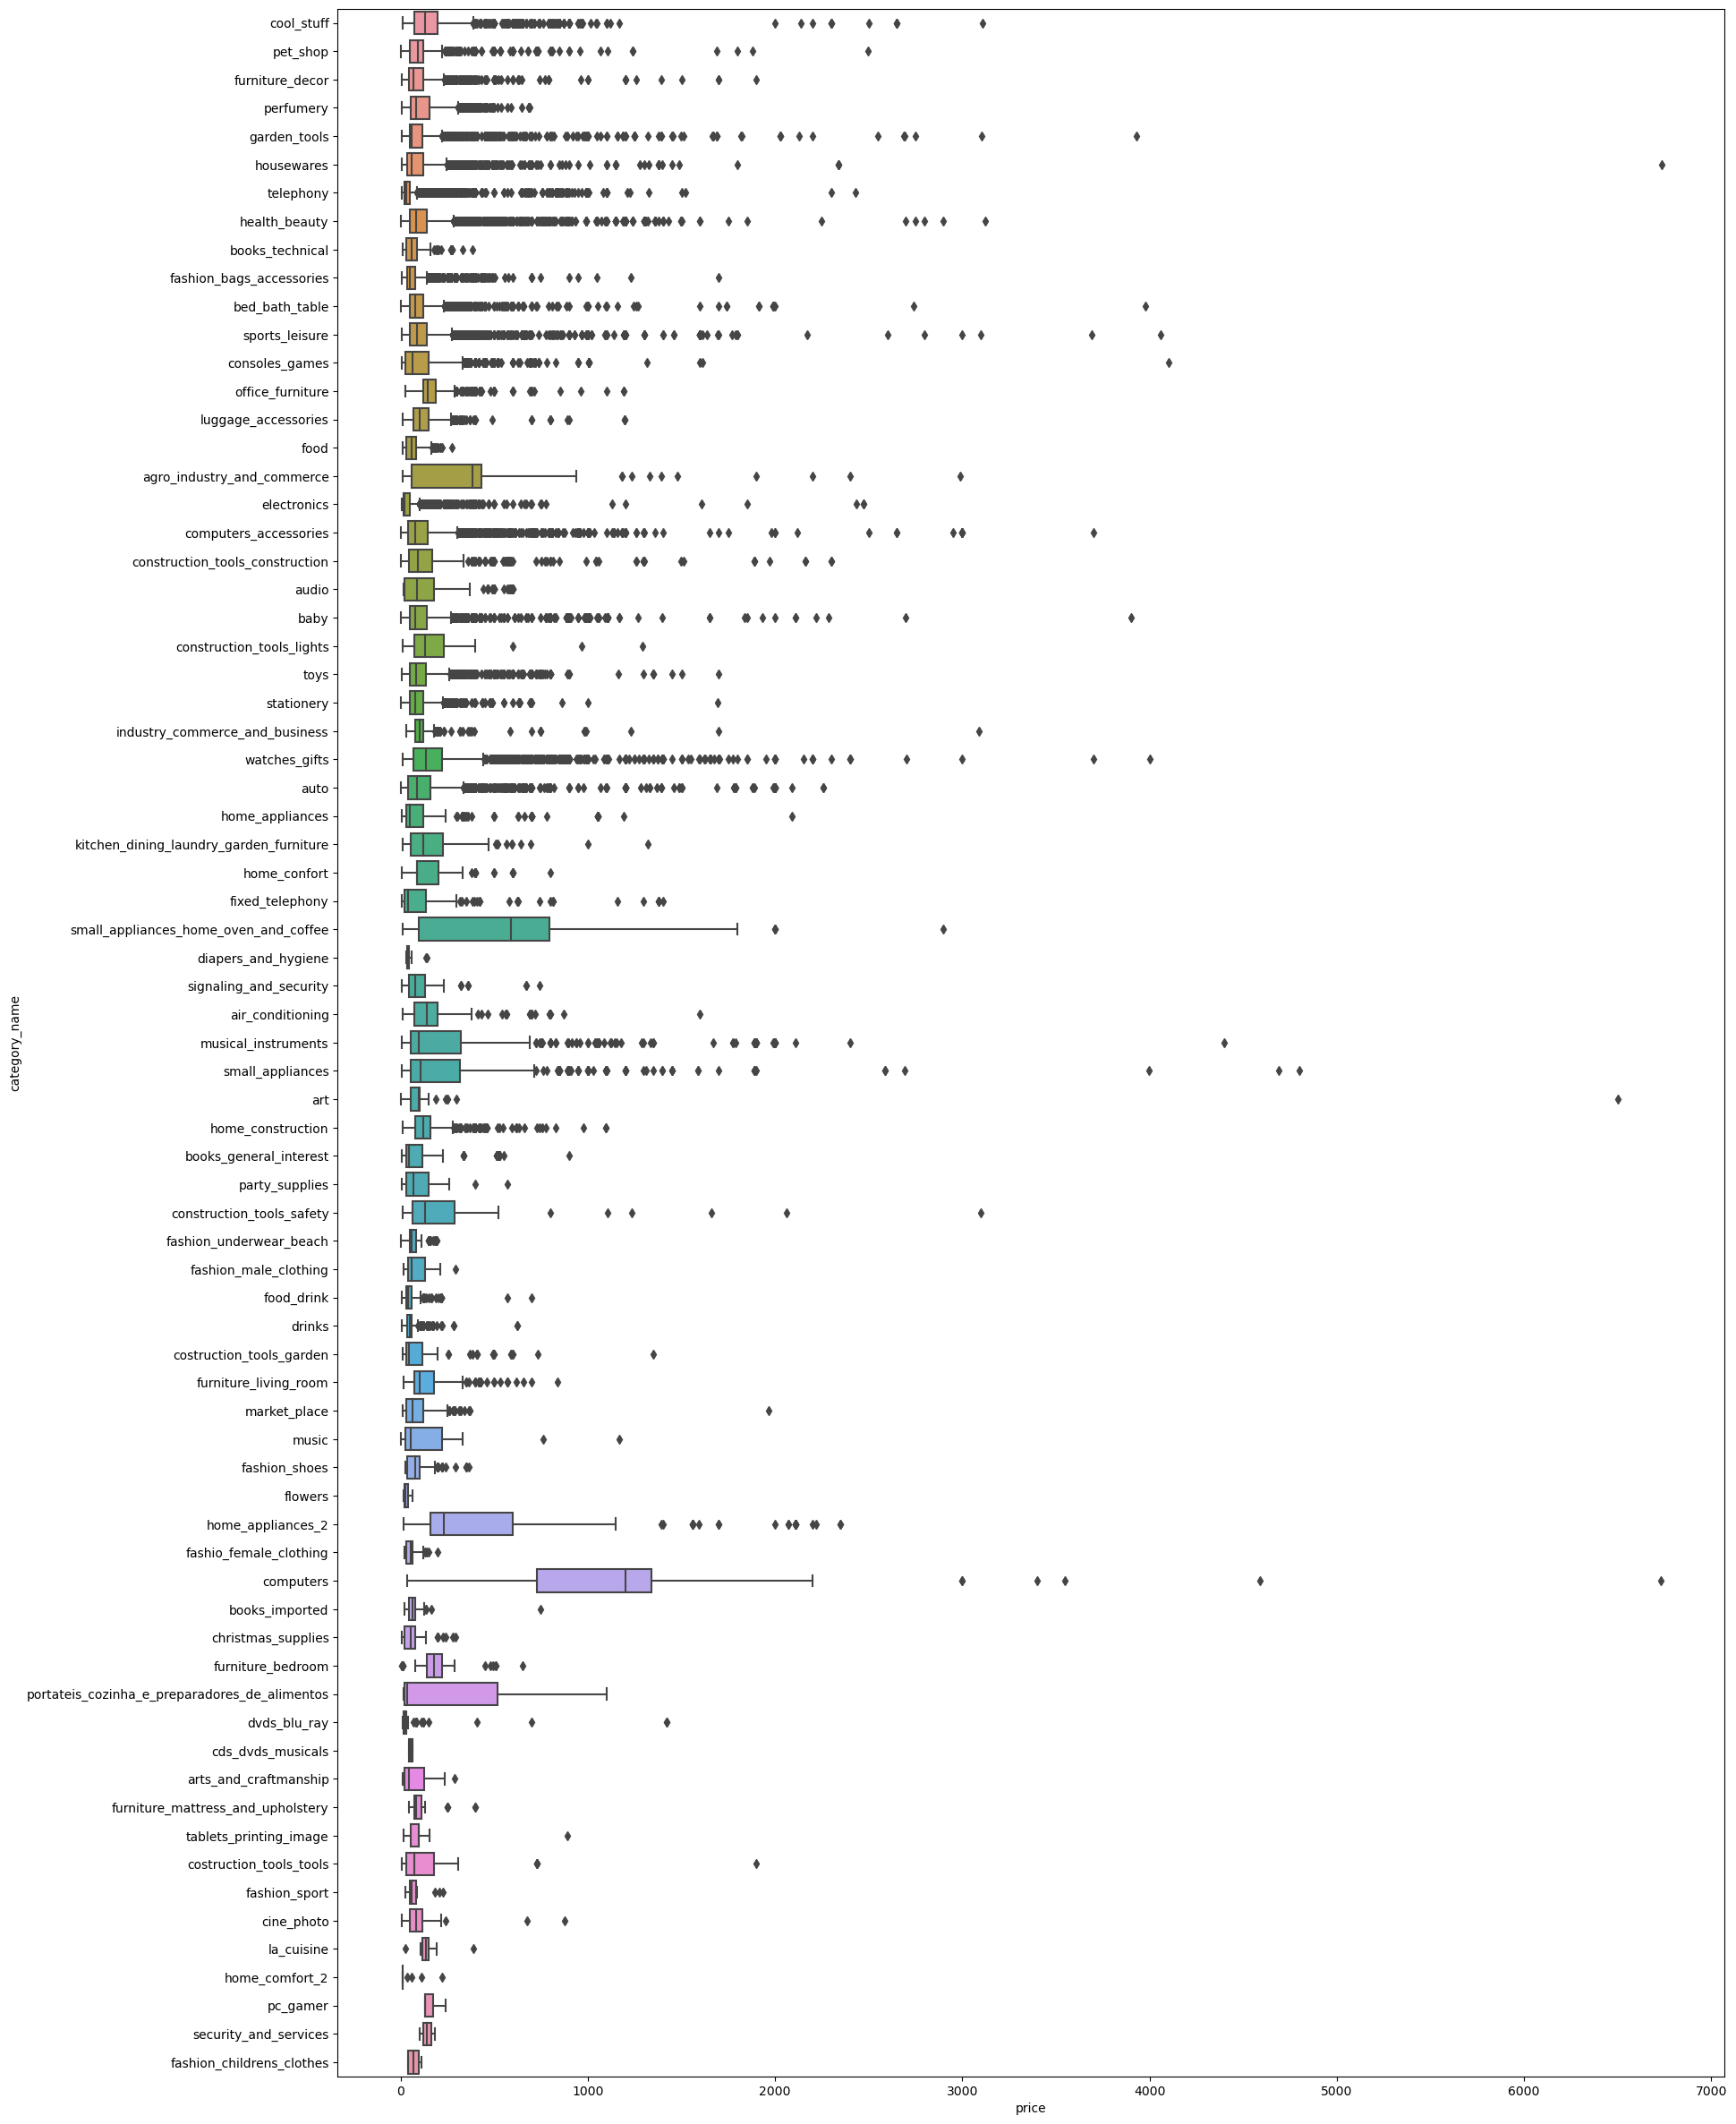

In [24]:
# for outlier, it best if we focus our attention on the prices since it'll affect our analysis


fig, ax = plt.subplots(figsize=(20, 30))
boxplt_price = sns.boxplot(data, x = 'price', y = 'category_name', ax=ax)

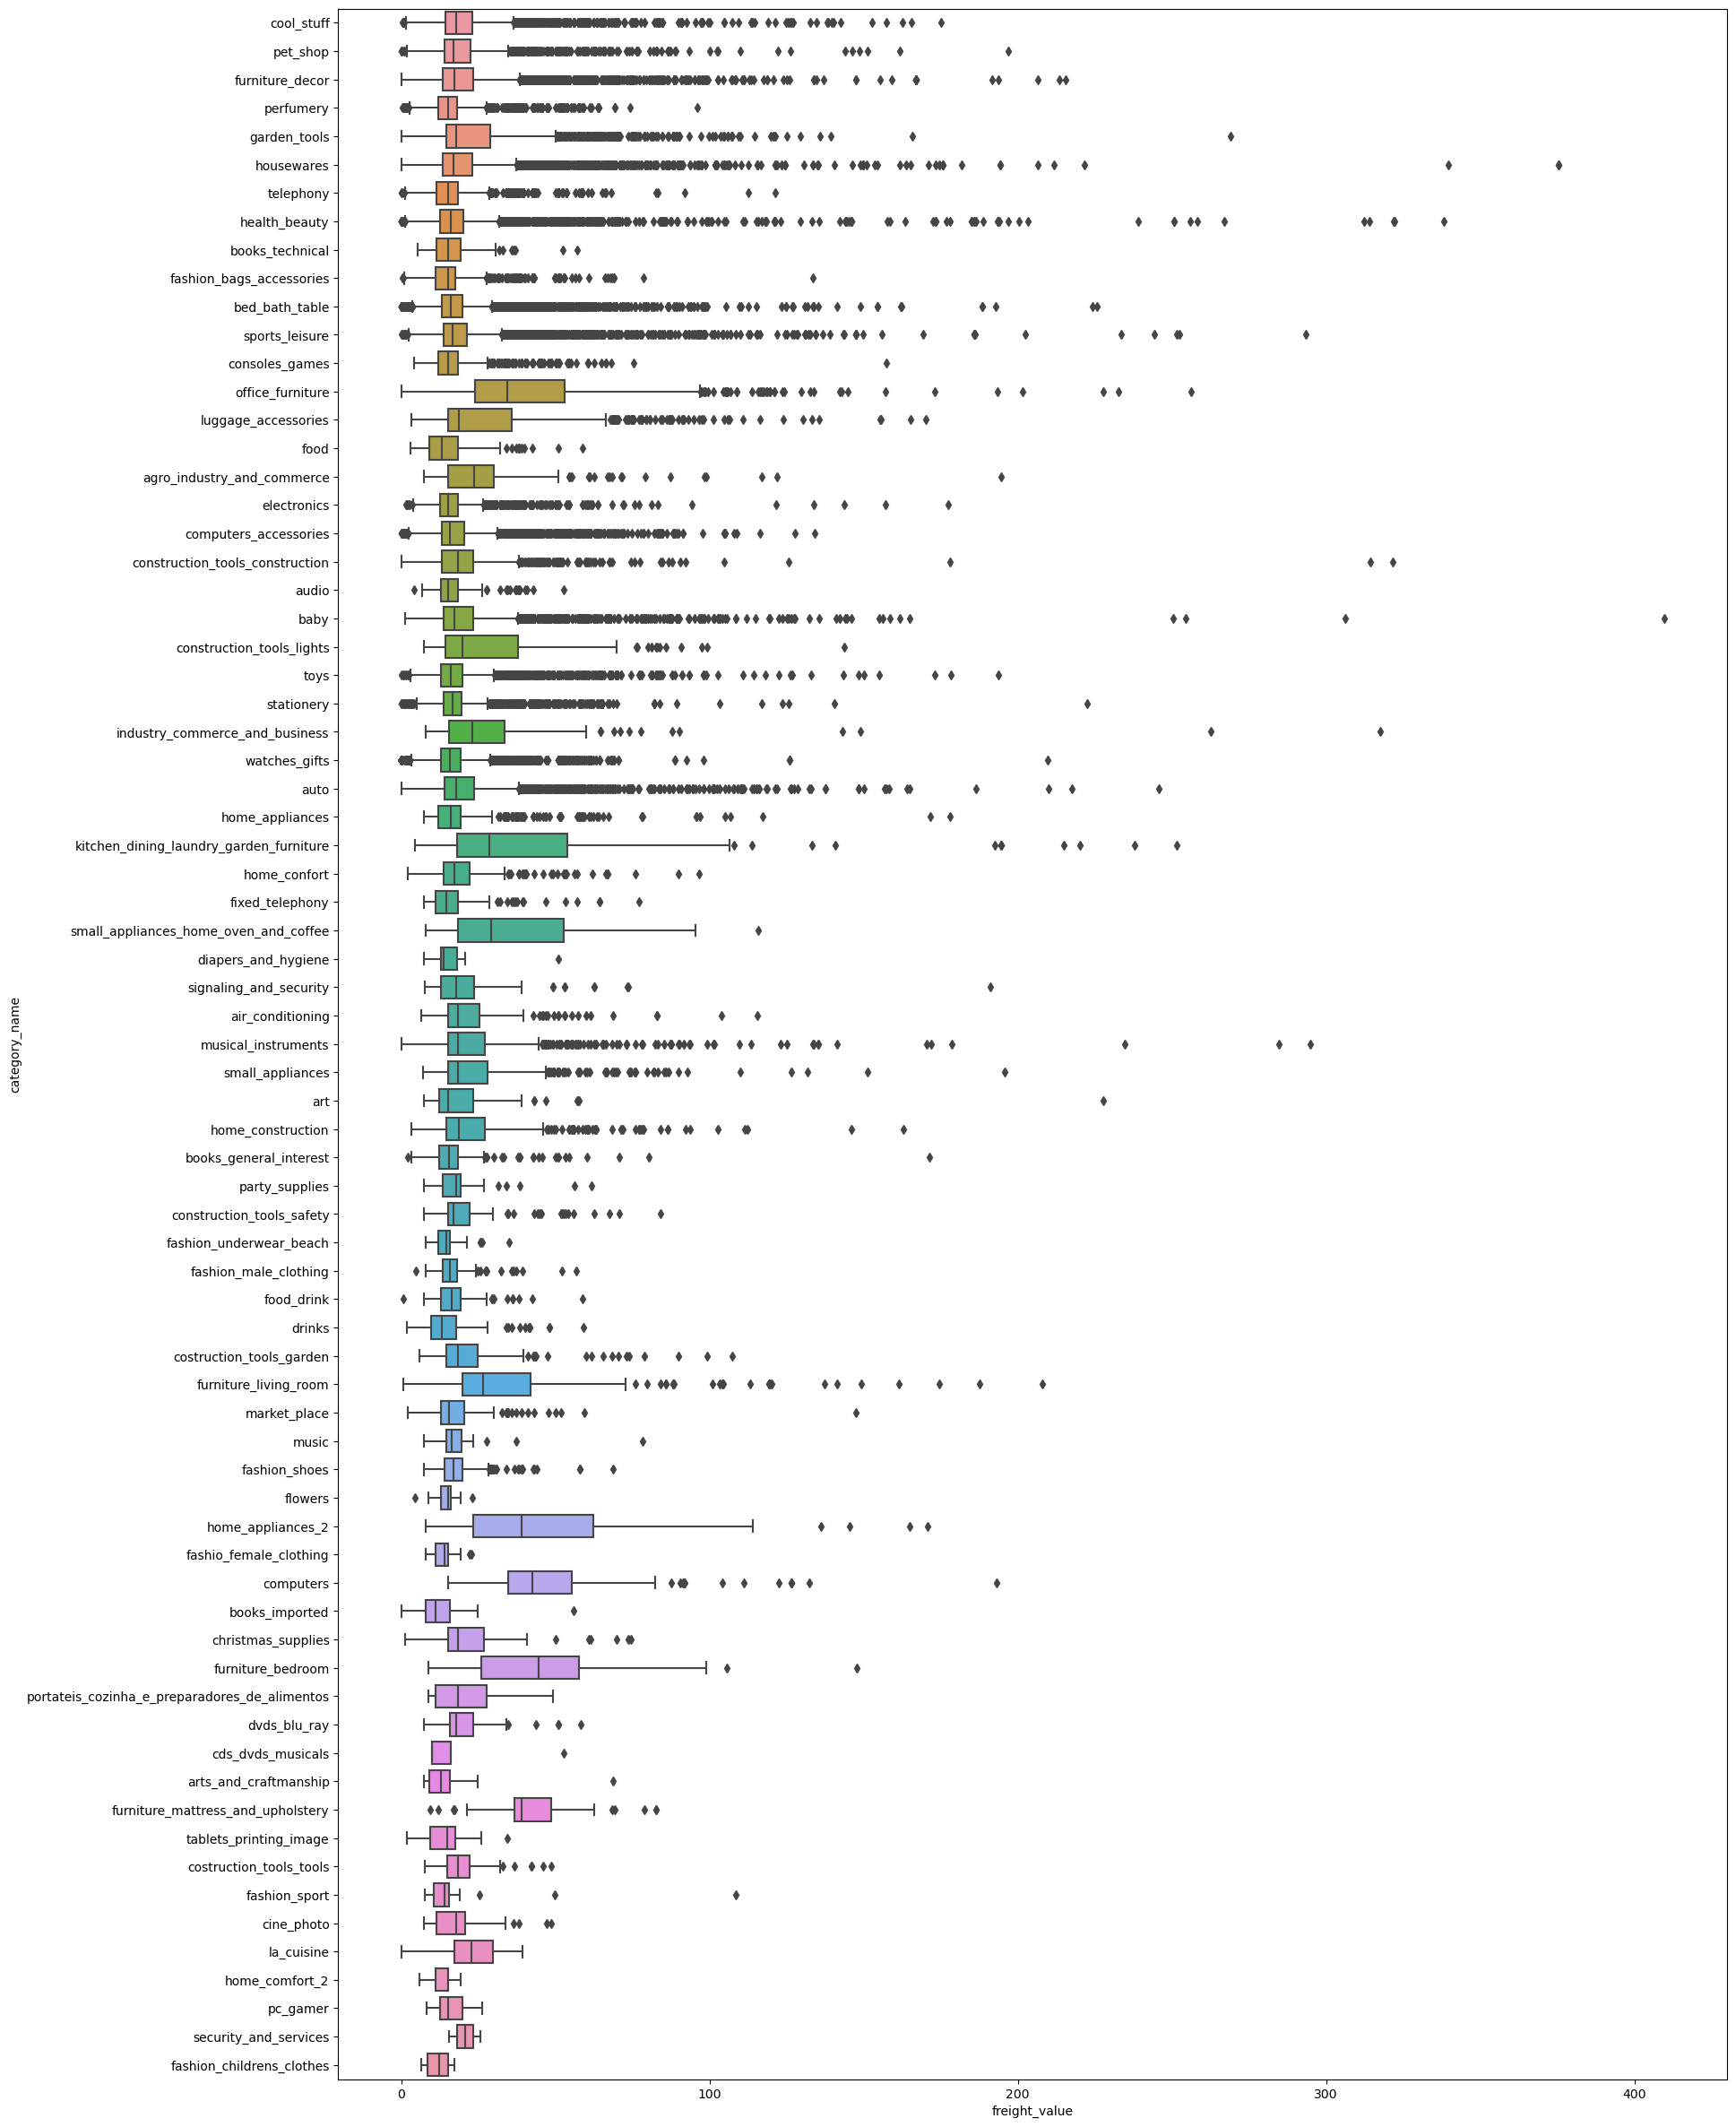

In [25]:
# and we do the same with freight value

fig, ax = plt.subplots(figsize=(20, 30))
boxplt_price = sns.boxplot(data, x = 'freight_value', y = 'category_name', ax=ax)

In [26]:
# quite a lot of outliers there
# let's calculate the price outliers
# z-scores formula: dataset - average / standard deviation

z_scores = (data['price'] - data['price'].mean()) / data['price'].std()

# let's set the z-scores threshold number to 3, and calculate the % from total data

outliers_price = (z_scores.abs() > 3).sum()
print(f'outliers in price is: {outliers_price}')
print(f'percentage of price outliers in the data is: {(outliers_price / len(data) * 100).round(1)}')

outliers in price is: 1641
percentage of price outliers in the data is: 1.7


In [27]:
# same method with freight value outliers

z_scores = (data['freight_value'] - data['freight_value'].mean()) / data['freight_value'].std()

# let's set the z-scores threshold number to 3, and calculate the % from total data

outliers_freight = (z_scores.abs() > 3).sum()
print(f'outliers in freight value is: {outliers_freight}')
print(f'percentage of freight value outliers in the data is: {(outliers_freight / len(data) * 100).round(1)}')

outliers in freight value is: 1709
percentage of freight value outliers in the data is: 1.8


C:\Users\MHR\AppData\Local\Temp\ipykernel_6740\2557982402.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['freight_value'])


<Axes: xlabel='freight_value', ylabel='Density'>

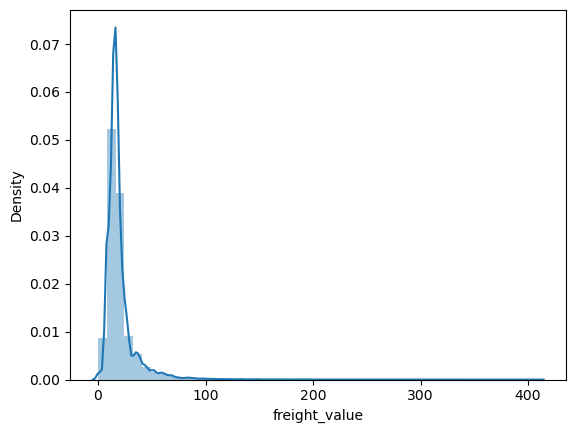

In [28]:
# we wont be manipulating the price dataset since we are calculating overall revenue share
# but we will be manipulating freight value dataset since we want to calculate average cost

sns.distplot(data['freight_value'])

C:\Users\MHR\AppData\Local\Temp\ipykernel_6740\3469740471.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(data_copy['freight_value']))


Axes(0.125,0.11;0.775x0.77)


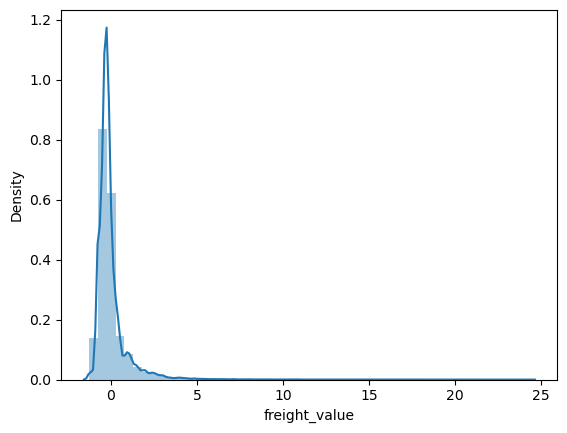

In [29]:
# this is actually common in e-commerce orders
# lots of reseller, SME, etc order in bulks
# their behavior are not affected by changes in our UI design, marketing effort, etc
# so we need to treat the outliers
# in other word: better to predict a normalized, average logistic cost
# compared to predicting cheap but in reality, more expensive logistic cost
# source: https://cxl.com/blog/outliers/#h-5-ways-to-deal-with-outliers-in-data

data_copy = data.copy()
for col in ['freight_value']:
    data_copy[col] = ((data_copy[col] - data_copy[col].mean())/data_copy[col].std())

print(sns.distplot(data_copy['freight_value']))

# reference: https://www.youtube.com/watch?v=AmCkjGPmdvI&t=53s

In [30]:
# we can see from above, the dataset std has changed
# from reaching +400 standard deviation to be normalized at +25

In [31]:
## Part 6: Best Selling Category

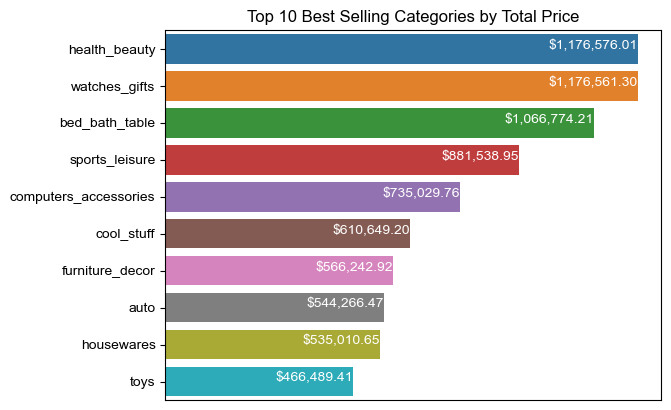

In [32]:
# calculating best selling category

import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

best_category = data.groupby('category_name').price.sum().sort_values(ascending=False)
best_category.head()

# editing some parameters
df_best_category = best_category.reset_index()
price_viz = sns.barplot(data=df_best_category.head(10), x='price', y='category_name')

# visualizing
for index, row in df_best_category.head(10).iterrows():
    formatted_price = locale.currency(row['price'], grouping=True)
    price_viz.text(row['price'], index, formatted_price, color='white', ha="right")

sns.set_style('whitegrid')
price_viz.set_ylabel('')
plt.xlabel('')
price_viz.set_xticks([])
plt.title('Top 10 Best Selling Categories by Total Price')
plt.show()


In [ ]:
# consider spend more marketing efforts into these selected categories

In [33]:
## Part 7: Best Cities

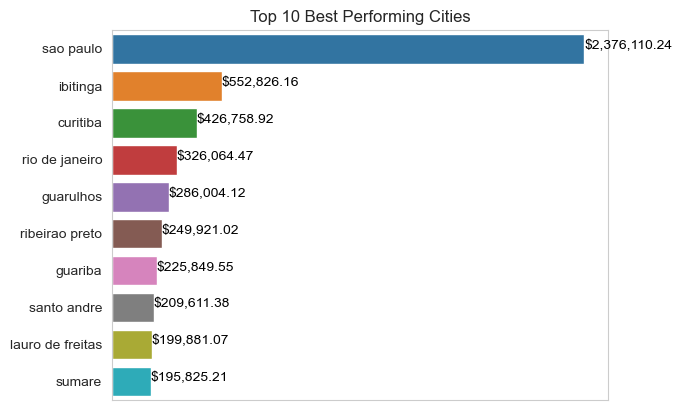

In [34]:
# analyzing revenue generated in each city

best_city = data.groupby('city').price.sum().sort_values(ascending=False)
best_city.head()

# editing some parameters
df_best_city = best_city.reset_index()
city_viz = sns.barplot(data=df_best_city.head(10), x='price', y='city')

# visualizing
for index, row in df_best_city.head(10).iterrows():
    formatted_price = locale.currency(row['price'], grouping=True)
    city_viz.text(row['price'], index, formatted_price, color='black', ha="left")

sns.set_style('whitegrid')
city_viz.set_ylabel('')
plt.xlabel('')
city_viz.set_xticks([])
plt.title('Top 10 Best Performing Cities')
plt.show()

In [35]:
# interesting that Sao Paolo dominate too much here, let's see the %

sao_paolo_percent = (2376110 / data['price'].sum() * 100).round(1)
print(sao_paolo_percent)

19.6


In [ ]:
# Sao Paolo contribute almost 20% of total revenue, that's a tier 1 city

In [36]:
## Part 8: Most Expensive logistic cost

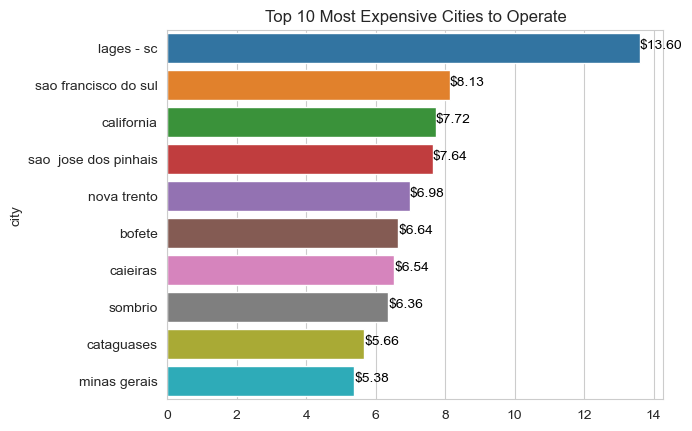

In [37]:
# analyzing average logistic cost per city

cost_city = data_copy.groupby('city').freight_value.mean().sort_values(ascending=False)
cost_city.head()

# editing some parameters
df_cost_city = cost_city.reset_index()
cost_viz = sns.barplot(data=df_cost_city.head(10), x='freight_value', y='city')

# visualizing
for index, row in df_cost_city.head(10).iterrows():
    formatted_price = locale.currency(row['freight_value'], grouping=True)
    cost_viz.text(row['freight_value'], index, formatted_price, color='black', ha="left")

sns.set_style('whitegrid')
city_viz.set_ylabel('')
plt.xlabel('')
city_viz.set_xticks([])
plt.title('Top 10 Most Expensive Cities to Operate')
plt.show()

In [ ]:
# none of these cities is also the top 10 biggest revenue contributor, consider reducing or investing more into this cities